In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette('Paired', 11)

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharth2000","key":"fab5078fec4290529de7b57932d52d0c"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json


In [7]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           2071  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1394  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2468  
Cornell-University/arxiv                               arXiv Dataset                                     888MB  2020-09-22 15:33:49           3115  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          

In [8]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 60.0MB/s]
100% 1.55G/1.56G [00:21<00:00, 86.7MB/s]
100% 1.56G/1.56G [00:22<00:00, 74.7MB/s]
  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 98.0MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 490kB/s]


In [9]:
!unzip train.csv.zip -d train.csv

Archive:  train.csv.zip
  inflating: train.csv/train.csv     


In [10]:
!ls
!pwd

GCP-Coupons-Instructions.rtf  sample_data	     test.csv	train.csv.zip
kaggle.json		      sample_submission.csv  train.csv
/content


In [11]:
train = pd.read_csv('/content/train.csv/train.csv', nrows=100000)

In [12]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [19]:
train[train['fare_amount'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
56748,2015-06-26 01:13:18.0000002,-5.0,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,2010-02-19 23:47:10.0000002,-44.9,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
97838,2015-06-07 02:54:14.0000004,-3.0,2015-06-07 02:54:14 UTC,-73.913246,40.766212,-73.914963,40.764065,5


In [15]:
train.drop(train[train['fare_amount']<0].index, axis=0, inplace=True)

In [16]:
train['fare_amount'].describe()

count    99991.000000
mean        11.356387
std          9.714697
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

In [17]:
# Removing outliers in latitude and longitude
# Latitude should lie between -90 to 90
# Longitude should lie between -180 to 180
train.drop(train[train['pickup_latitude'] > 90].index, axis=0, inplace=True)
train.drop(train[train['dropoff_latitude'] > 90].index, axis=0, inplace=True)
train.drop(train[train['pickup_longitude']<-180].index, axis=0, inplace=True)

In [18]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99988.000000,99988.000000,99988.000000,99988.000000,99988.000000,99988.000000
mean,11.356356,-72.487883,39.910780,-72.491534,39.915722,1.673781
std,9.714629,10.486343,6.120386,10.469494,6.104512,1.300098
min,0.000000,-78.083332,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992040,40.734998,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752766,-73.980001,40.753243,1.000000
75%,12.500000,-73.966986,40.767258,-73.963438,40.768164,2.000000
max,200.000000,40.787575,69.400000,40.851027,43.415190,6.000000


In [19]:
train.shape

(99988, 8)

In [20]:
train.drop('key', axis=1, inplace=True)

In [21]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [22]:
for row in train:
  train['year'] = train['pickup_datetime'].dt.year
  train['month'] = train['pickup_datetime'].dt.month
  train['day'] = train['pickup_datetime'].dt.day
  train['hour'] = train['pickup_datetime'].dt.hour
  train['weekday'] = train['pickup_datetime'].dt.dayofweek

In [23]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


**EDA**

Text(0.5, 1.0, 'Fare Distribution')

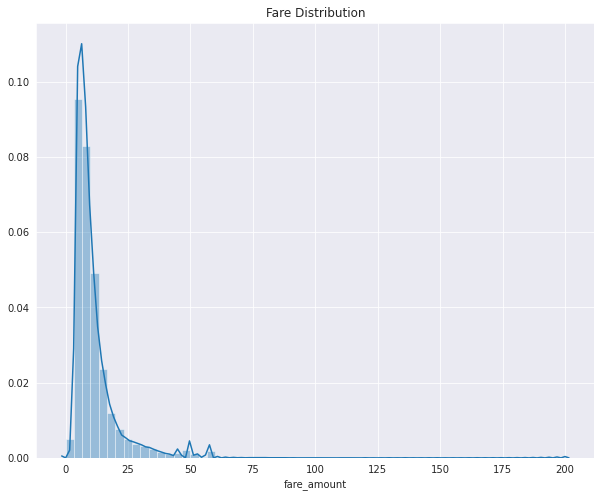

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(train['fare_amount'], bins=60, kde=True)
plt.title('Fare Distribution')

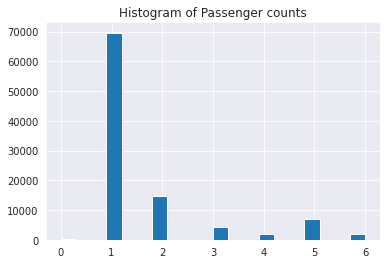

In [43]:
plt.hist(train['passenger_count'], bins=20)
plt.title('Histogram of Passenger counts')
plt.show()

Text(0.5, 1.0, 'Plot of date of month vs fare')

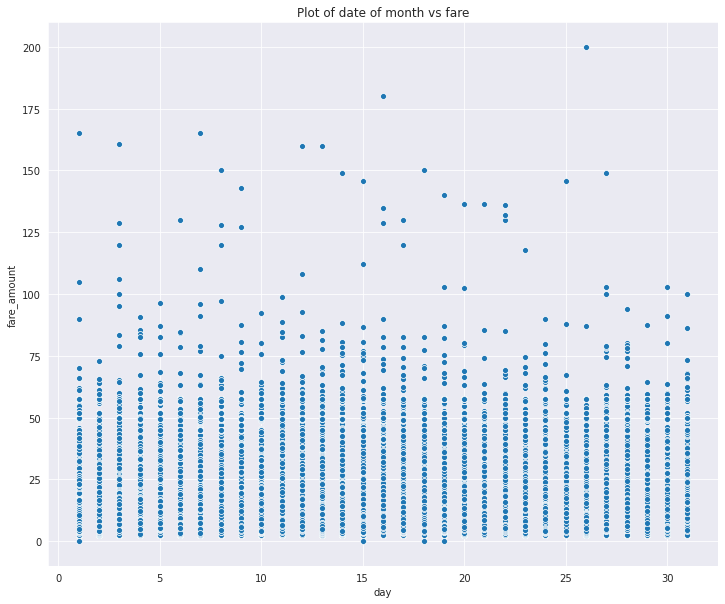

In [45]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=train['day'], y=train['fare_amount'], data=train)
plt.title('Plot of date of month vs fare')

Text(0.5, 1.0, 'Plot of date of hour vs fare')

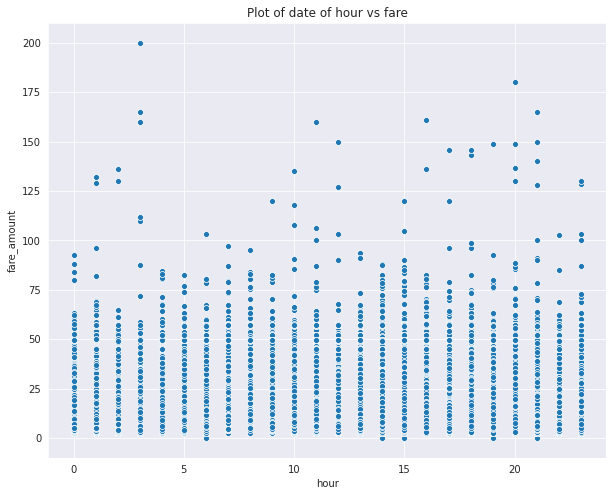

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=train['hour'], y=train['fare_amount'], data=train)
plt.title('Plot of date of hour vs fare')

Text(0.5, 1.0, 'Histogram of hourly rides')

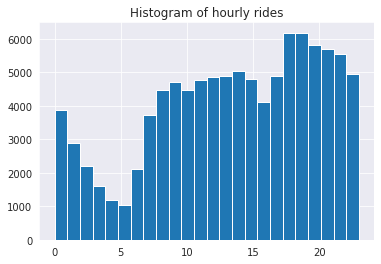

In [51]:
plt.hist(x=train['hour'], bins=24)
plt.title('Histogram of hourly rides')

Text(0.5, 1.0, 'Plot of day of week vs fare')

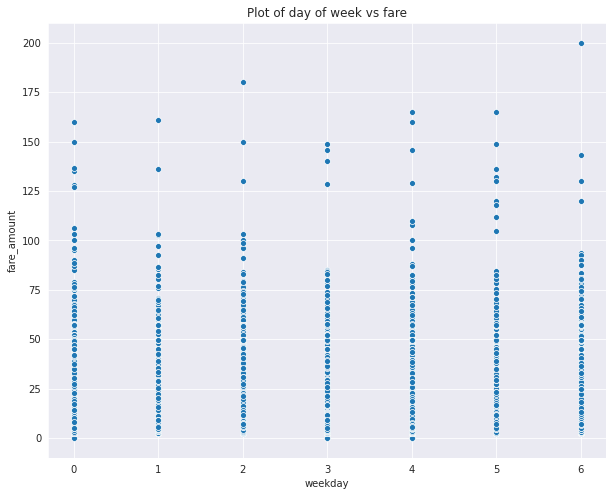

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=train['weekday'], y=train['fare_amount'], data=train)
plt.title('Plot of day of week vs fare')

In [59]:
print (len(train[train['fare_amount'] > 100]))

40


In [61]:
train[train['fare_amount']<2.5].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.004000,-73.985352,40.767058,-73.989975,40.762262,1.0,2013.000000,3.400000,13.600000,15.000000,2.800000
std,0.005477,0.056108,0.040808,0.056222,0.046263,0.0,2.738613,1.516575,7.266361,5.787918,1.643168
min,0.000000,-74.077927,40.713963,-74.077919,40.713960,1.0,2010.000000,2.000000,1.000000,6.000000,0.000000
25%,0.000000,-73.987115,40.738808,-74.005911,40.713997,1.0,2010.000000,2.000000,15.000000,14.000000,3.000000
50%,0.000000,-73.980331,40.770535,-73.981911,40.771503,1.0,2015.000000,3.000000,15.000000,15.000000,3.000000
75%,0.010000,-73.942346,40.805714,-73.942463,40.805721,1.0,2015.000000,5.000000,18.000000,19.000000,4.000000
max,0.010000,-73.939041,40.806269,-73.941673,40.806129,1.0,2015.000000,5.000000,19.000000,21.000000,4.000000


In [24]:
# On checking the NYC transport website, it says that the minimum fare is 2.5 dollars, so we must remove all entries with fare < 2.5

train = train.loc[train['fare_amount'] >= 2.5]
train.shape

(99983, 12)

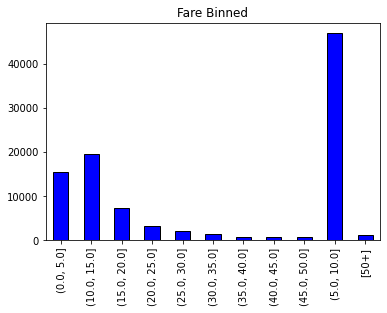

In [25]:
# Bin the fare and convert to string
train['fare-bin'] = pd.cut(train['fare_amount'], bins = list(range(0, 55, 5))).astype(str)

# Uppermost bin
train.loc[train['fare-bin'] == 'nan', 'fare-bin'] = '[50+]'

# Adjust bin so the sorting is correct
train.loc[train['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'

# Bar plot of value counts
train['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned');

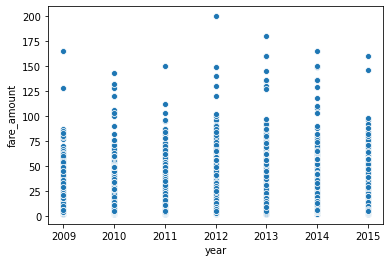

In [26]:
sns.scatterplot(y=train['fare_amount'],x= train['year'])

Removing outliers from the dataset

In [30]:
# I will be using Z-scores for removing outliers from the dataset
from scipy.stats import zscore

print('Before outlier removal shape was: ', train.shape)
z_scores = zscore(train[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df = train[filtered_entries]
print('After removal of outliers, shape is: ', df.shape)

Before outlier removal shape was:  (99983, 13)
After removal of outliers, shape is:  (97908, 13)


In [31]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
count,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000
mean,11.346236,-73.975193,40.751034,-73.974015,40.751464,1.674235,2011.741982,6.261705,15.662479,13.494372,3.036218
std,9.688171,0.045640,0.036153,0.039891,0.037151,1.300117,1.868183,3.452118,8.675896,6.504368,1.949377
min,2.500000,-78.083332,38.754215,-75.354559,39.296307,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992268,40.736633,-73.991399,40.735749,1.000000,2010.000000,3.000000,8.000000,9.000000,1.000000
50%,8.500000,-73.982077,40.753533,-73.980436,40.753961,1.000000,2012.000000,6.000000,16.000000,14.000000,3.000000
75%,12.500000,-73.968290,40.767678,-73.965121,40.768484,2.000000,2013.000000,9.000000,23.000000,19.000000,5.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,2015.000000,12.000000,31.000000,23.000000,6.000000


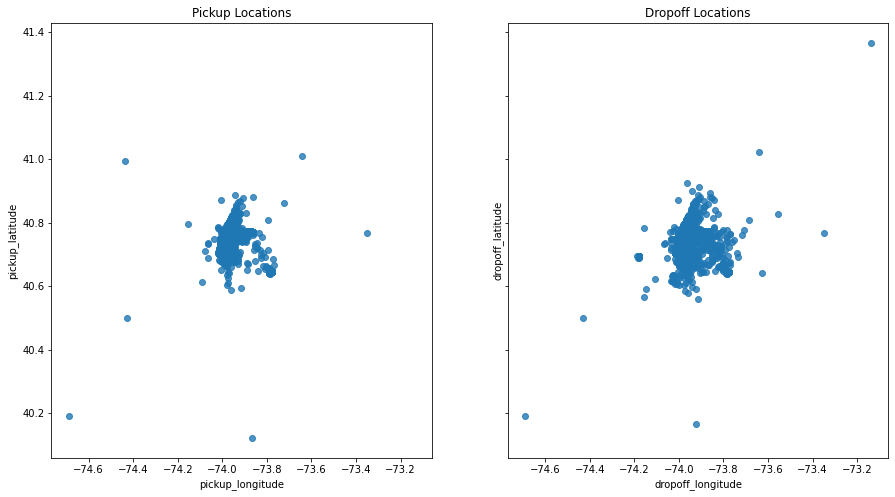

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = df.sample(10000, random_state = 10), ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = df.sample(10000, random_state = 10), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

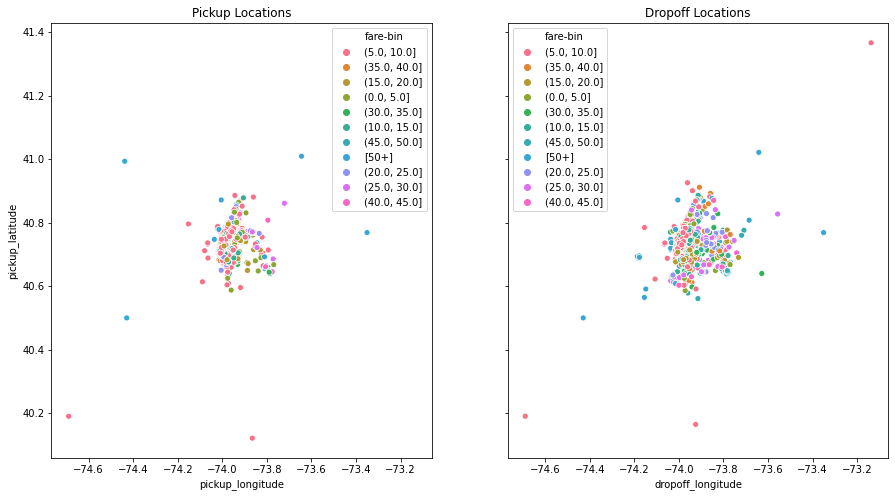

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.scatterplot('pickup_longitude', 'pickup_latitude', hue='fare-bin',
            data = df.sample(10000, random_state = 10), ax = axes[0]);
sns.scatterplot('dropoff_longitude', 'dropoff_latitude', hue='fare-bin' ,
            data = df.sample(10000, random_state = 10), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

<Figure size 576x576 with 0 Axes>

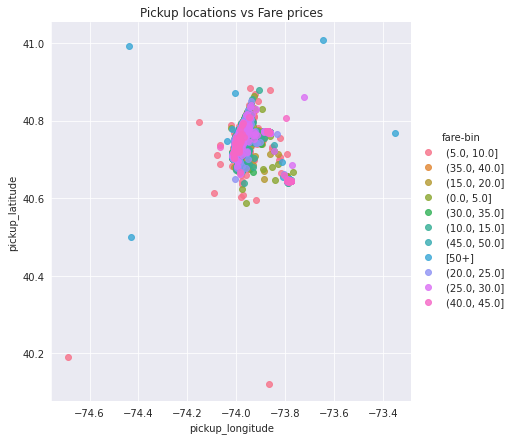

In [47]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.lmplot('pickup_longitude', 'pickup_latitude', hue = 'fare-bin', height = 6, 
           fit_reg = False, data = df.sample(10000, random_state=10));
plt.title('Pickup locations vs Fare prices');
plt.show()

<Figure size 576x576 with 0 Axes>

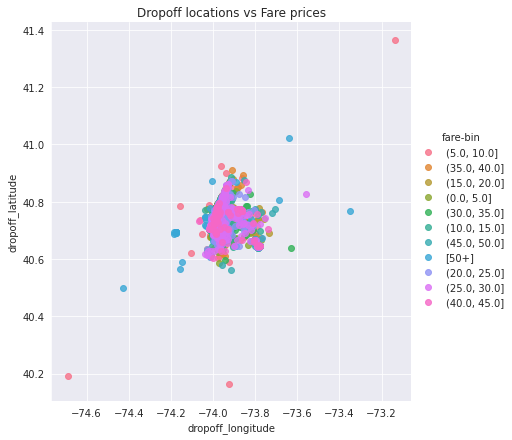

In [48]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.lmplot('dropoff_longitude', 'dropoff_latitude', hue = 'fare-bin', height = 6, 
           fit_reg = False, data = df.sample(10000, random_state=10));
plt.title('Dropoff locations vs Fare prices');
plt.show()

In [49]:
# Now lets introduce a metric which helps tells us exactly about the distance between pickup location and dropoff location
# For calculating the distances using latitudes and longitudes I will use the 'Haversine Formula'

#Radius of earth in kms
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [50]:
df['haversine'] =  haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                         df['dropoff_longitude'], df['dropoff_latitude']) 
df['haversine'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    97908.000000
mean         3.381830
std          4.621921
min          0.000000
25%          1.256743
50%          2.160098
75%          3.933284
max        376.859148
Name: haversine, dtype: float64

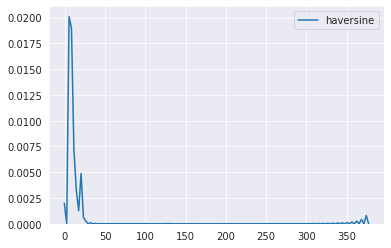

In [51]:
sns.kdeplot(df['haversine'])

In [94]:
df.groupby('fare-bin')['haversine'].agg(['mean', 'count', 'median'])

,mean,count,median
fare-bin,,,
"(0.0, 5.0]",0.967636,15152,0.831487
"(10.0, 15.0]",3.756417,19322,3.620238
"(15.0, 20.0]",5.583553,7235,5.561672
"(20.0, 25.0]",7.567772,3150,7.491099
"(25.0, 30.0]",9.530743,1988,9.470782
"(30.0, 35.0]",10.865359,1454,10.082488
"(35.0, 40.0]",11.655164,843,10.741069
"(40.0, 45.0]",14.243058,691,14.520445
"(45.0, 50.0]",17.222076,787,19.963573


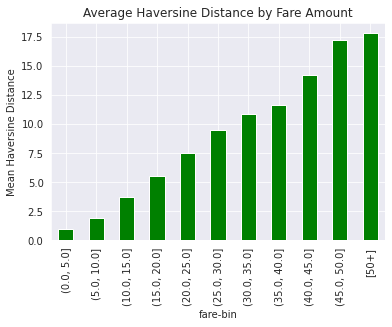

In [60]:
df.groupby('fare-bin')['haversine'].mean().sort_values().plot.bar(color = 'g');
plt.title('Average Haversine Distance by Fare Amount');
plt.ylabel('Mean Haversine Distance');

In [ ]:
# Create a color mapping based on fare bins
color_mapping = {fare_bin: palette[i] for i, fare_bin in enumerate(df['fare-bin'].unique())}

df['color'] = df['fare-bin'].map(color_mapping)
plot_df = df.sample(10000, random_state = 10)

In [73]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,fare-bin,haversine,color
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,"(0.0, 5.0]",1.031896,"(0.6509803921568628, 0.807843137254902, 0.8901..."
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,"(15.0, 20.0]",8.459418,"(0.12156862745098039, 0.47058823529411764, 0.7..."
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,"(5.0, 10.0]",1.391052,"(0.6980392156862745, 0.8745098039215686, 0.541..."
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,"(5.0, 10.0]",2.802346,"(0.6980392156862745, 0.8745098039215686, 0.541..."
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,"(5.0, 10.0]",2.001353,"(0.6980392156862745, 0.8745098039215686, 0.541..."


Text(0.5, 0, 'Distance')

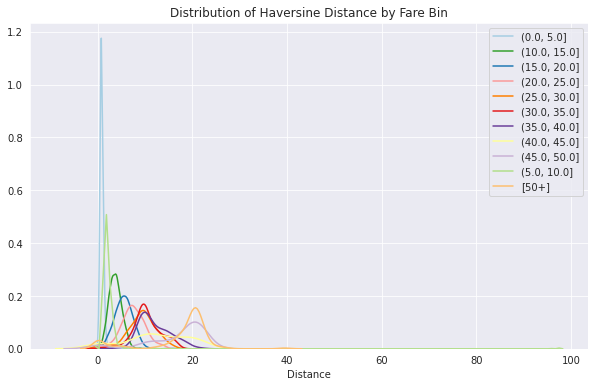

In [75]:
subset = df.sample(10000, random_state=10)
plt.figure(figsize = (10, 6))

for f, grouped in subset.groupby('fare-bin'):
    sns.kdeplot(grouped['haversine'], label = f'{f}', color = list(grouped['color'])[0]);
    
plt.title('Distribution of Haversine Distance by Fare Bin');
plt.xlabel('Distance')

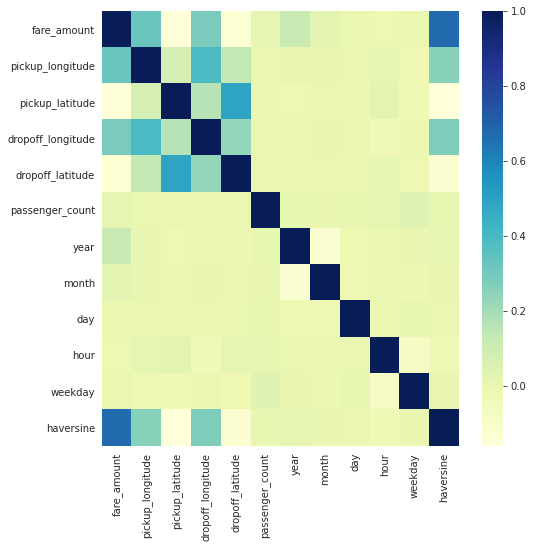

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='YlGnBu')

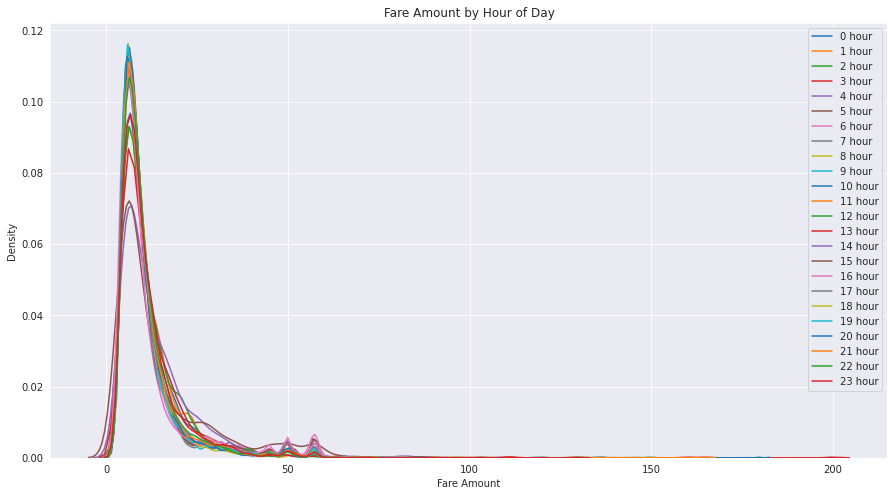

In [83]:
plt.figure(figsize = (15, 8))
for h, grouped in df.groupby('hour'):
    sns.kdeplot(grouped['fare_amount'], label = f'{h} hour');
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.title('Fare Amount by Hour of Day');

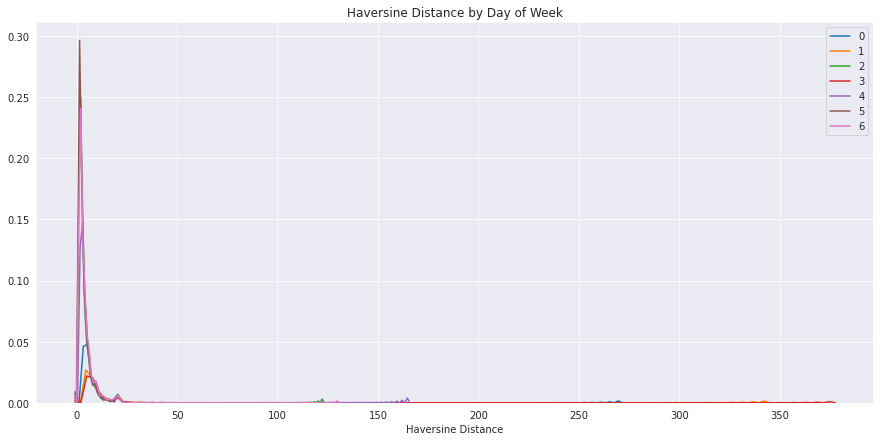

In [90]:
plt.figure(figsize = (15, 7))
for d, grouped in df.groupby('weekday'):
    sns.kdeplot(grouped['haversine'], label = f'{d}')

plt.xlabel('Haversine Distance')
plt.title('Haversine Distance by Day of Week');

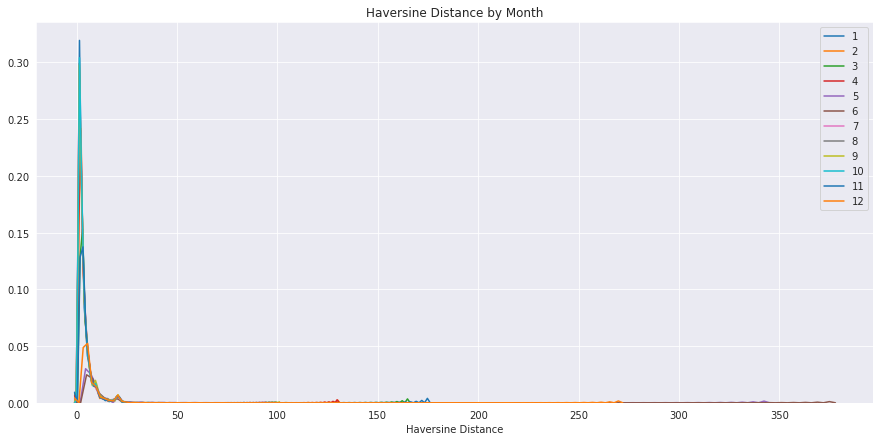

In [92]:
plt.figure(figsize = (15, 7))
for m, grouped in df.groupby('month'):
    sns.kdeplot(grouped['haversine'], label = f'{m}')

plt.xlabel('Haversine Distance')
plt.title('Haversine Distance by Month');

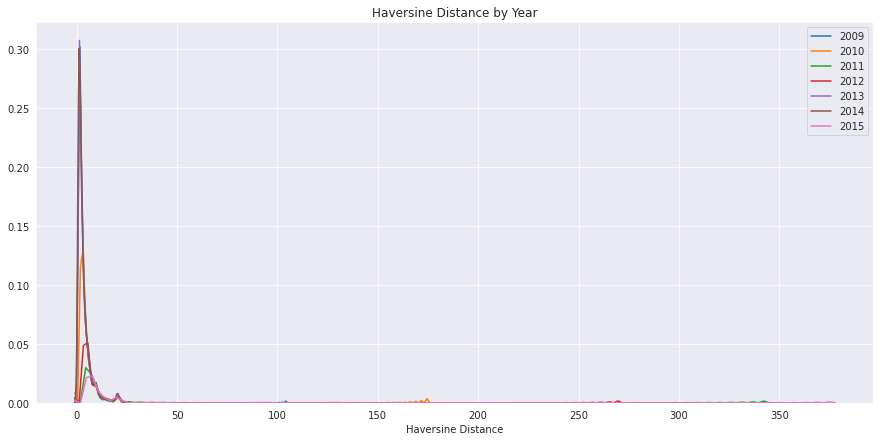

In [95]:
plt.figure(figsize = (15, 7))
for y, grouped in df.groupby('year'):
    sns.kdeplot(grouped['haversine'], label = f'{y}')

plt.xlabel('Haversine Distance')
plt.title('Haversine Distance by Year');

In [97]:
df.drop('pickup_datetime', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,fare-bin,haversine,color
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,"(0.0, 5.0]",1.031896,"(0.6509803921568628, 0.807843137254902, 0.8901..."
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,"(15.0, 20.0]",8.459418,"(0.12156862745098039, 0.47058823529411764, 0.7..."
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,"(5.0, 10.0]",1.391052,"(0.6980392156862745, 0.8745098039215686, 0.541..."
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,"(5.0, 10.0]",2.802346,"(0.6980392156862745, 0.8745098039215686, 0.541..."
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,"(5.0, 10.0]",2.001353,"(0.6980392156862745, 0.8745098039215686, 0.541..."


In [99]:
print ('COnverting df to CSV file...')
df.to_csv('train_file.csv')
print('Done')

COnverting df to CSV file...
Done
